In [18]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Pair Programming Ajuste
Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

    - Realizar el ajuste o ajustes de los modelos
    - Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [19]:
df_est_enc = pd.read_pickle('data/card_est_enc.pkl')
df_balanceo = pd.read_pickle('data/df_balanceo.pkl')

In [20]:
# separamos los datos en X e y

X1 = df_est_enc.drop("fraud", axis = 1)
y1 = df_est_enc["fraud"]

In [21]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 59)

In [22]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [23]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
602822,0.0,0.0,Train
486368,0.0,0.0,Train
982357,0.0,0.0,Train
158476,0.0,0.0,Train
77139,0.0,0.0,Train


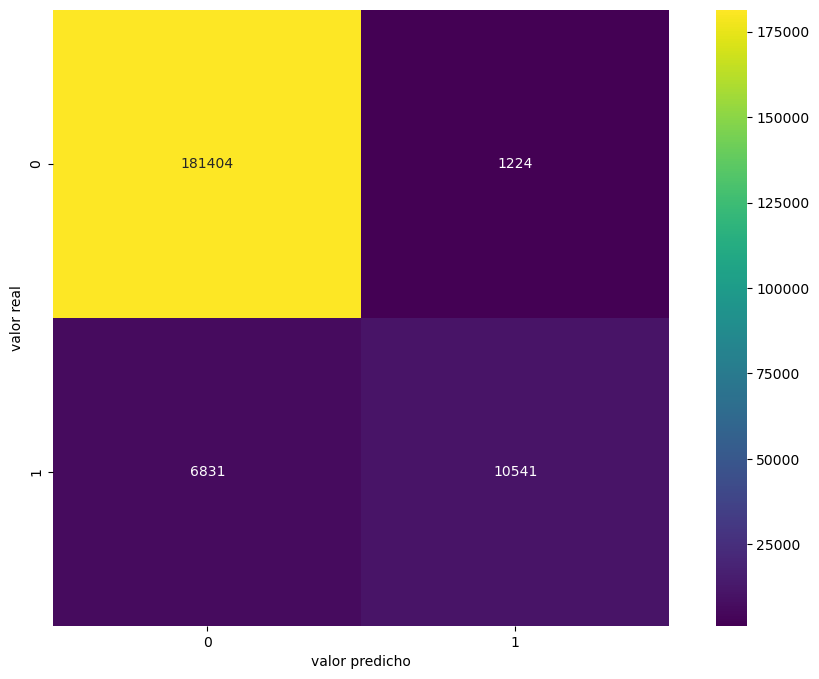

In [24]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [25]:
# separamos los datos en X e y

X2 = df_balanceo.drop("fraud", axis = 1)
y2 = df_balanceo["fraud"]

In [26]:
df_balanceo.isnull().sum()

fraud                             0
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
dtype: int64

In [27]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [28]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg_esta.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg_esta.predict(x_test2)

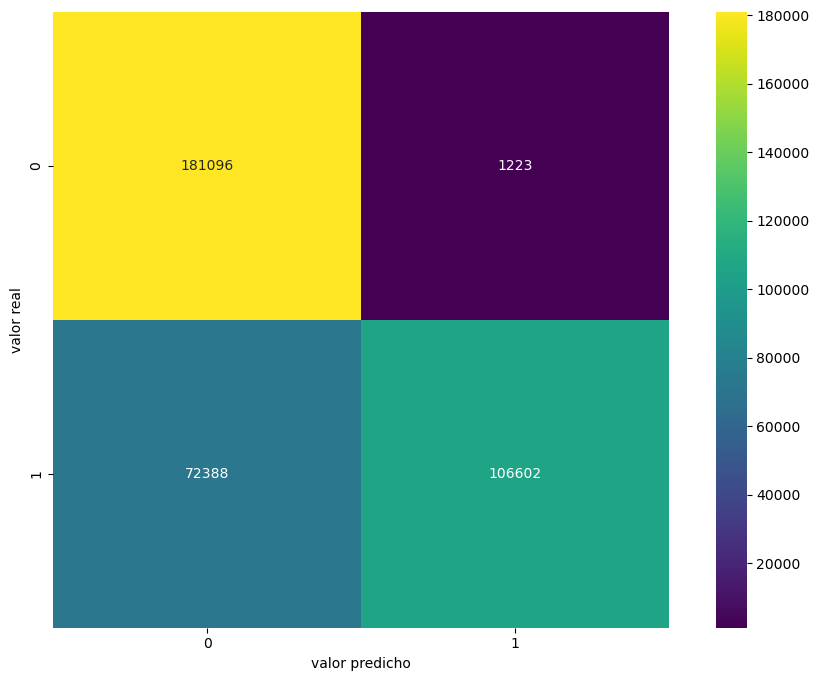

In [29]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y SIN ESTANDARIZAR

mat_lr2 = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()